In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model as lm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("datos.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


In [ ]:
df.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,50.732192,37.134247,3.39589,3.083562,2.866438,1.767123,2.758904,180921.195890,0.032877
std,9981.264932,1.382997,1.112799,30.202904,20.645407,0.57428,0.351054,0.815778,0.747315,40.177307,79442.502883,0.178375
min,1300.000000,1.000000,1.000000,12.000000,12.000000,2.00000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,7553.500000,5.000000,5.000000,22.000000,18.000000,3.00000,3.000000,2.000000,1.000000,0.000000,129975.000000,0.000000
50%,9478.500000,6.000000,5.000000,49.000000,28.000000,3.00000,3.000000,3.000000,2.000000,0.000000,163000.000000,0.000000
75%,11601.500000,7.000000,6.000000,68.000000,55.000000,4.00000,3.000000,3.000000,2.000000,0.000000,214000.000000,0.000000
max,215245.000000,10.000000,9.000000,150.000000,72.000000,5.00000,5.000000,8.000000,4.000000,738.000000,755000.000000,1.000000


In [ ]:
C1=df['LotArea'].quantile(0.25)
C3=df['LotArea'].quantile(0.75)

In [ ]:
IQR= C3-C1

In [ ]:
L_inf=C1-IQR*1.5

In [ ]:
L_sup=C3+IQR*1.5

In [ ]:
df=df[(df['LotArea']>=L_inf)&(df['LotArea']<=L_sup)]

# Histogrmas de variables importanrtes en el modelo

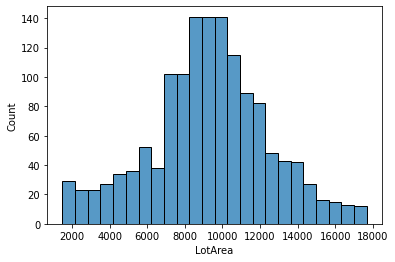

In [ ]:
sns.histplot(df['LotArea'])

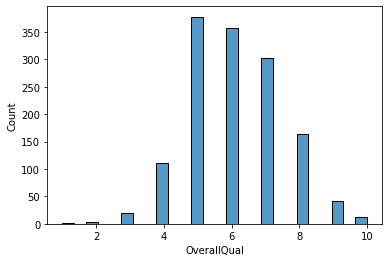

In [ ]:
sns.histplot(df['OverallQual'])

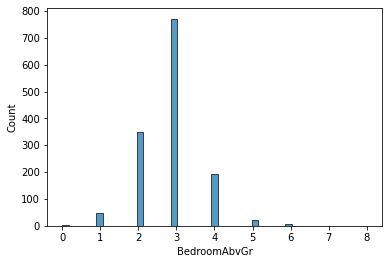

In [ ]:
sns.histplot(df['BedroomAbvGr'])

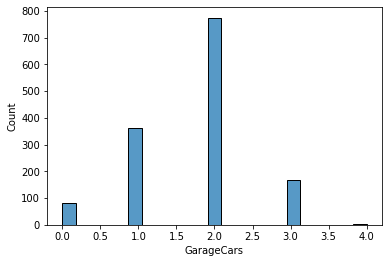

In [ ]:
sns.histplot(df['GarageCars'])

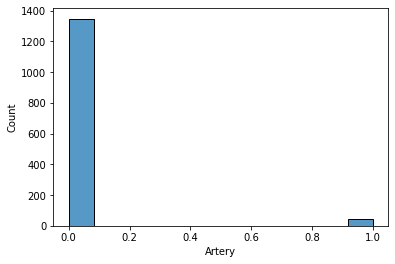

In [ ]:
sns.histplot(df['Artery'])

# Diagramas de dispersión

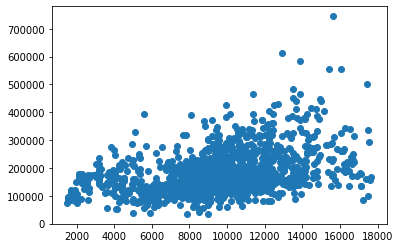

In [ ]:
x=df['LotArea'].values
y=df['SalePrice'].values
plt.plot(x,y,'o')

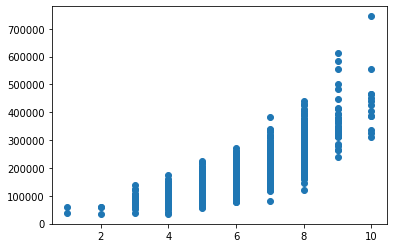

In [ ]:
x=df['OverallQual'].values
y=df['SalePrice'].values
plt.plot(x,y,'o')

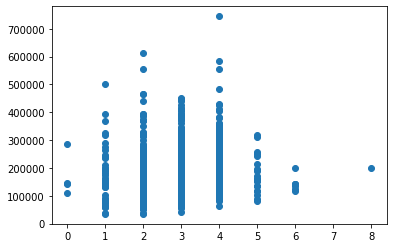

In [ ]:
x=df['BedroomAbvGr'].values
y=df['SalePrice'].values
plt.plot(x,y,'o')

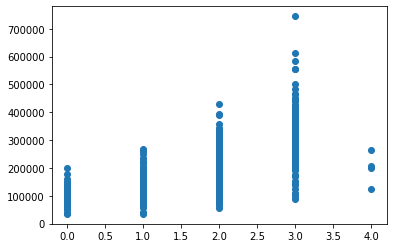

In [ ]:
x=df['GarageCars'].values
y=df['SalePrice'].values
plt.plot(x,y,'o')

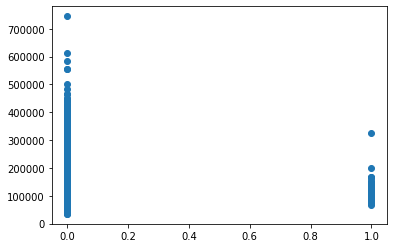

In [ ]:
x=df['Artery'].values
y=df['SalePrice'].values
plt.plot(x,y,'o')

# Módelo

In [ ]:
x=df.copy()
y=x.pop('SalePrice')
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     416.2
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:36:40   Log-Likelihood:                -16584.
No. Observations:                1391   AIC:                         3.319e+04
Df Residuals:                    1379   BIC:                         3.326e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.459e+05    1.4e+04    -10.401      0.000   -1.73e+05   -1.18e+05
LotArea          5.0852      0.340     14.964      0.000       4.419       5.752
OverallQual   2.507e+04   1178.354     21.276      0.000    2.28e+04    2.74e+04
OverallCond   2264.4530   1122.781      2.017      0.044      61.909    4466.997
YearBuilt      -98.0378     53.625     -1.828      0.068    -203.233       7.157
YearRemodAdd  -167.9318     69.667     -2.411      0.016    -304.596     -31.268
ExterQual     2.729e+04   2749.006      9.928      0.000    2.19e+04    3.27e+04
ExterCond    -3230.0484   3097.418     -1.043      0.297   -9306.208    2846.112
BedroomAbvGr  4261.4786   1305.336      3.265      0.001    1700.820    6822.137
GarageCars    1.595e+04   1806.031      8.833      0.000    1.24e+04    1.95e+04
PoolArea       175.1467     31.968      5.479      0.000     112.436     237.858
Artery       -1.474e+04   5798.441     -2.543      0.011   -2.61e+04   -3369.618
==============================================================================
Omnibus:                      555.744   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5213.691
Skew:                           1.594   Prob(JB):                         0.00
Kurtosis:                      11.933   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg.params["Artery"]

-14744.336641778114

In [ ]:
#Al vivir cerca de un gran contaminante el precio cae en 14.744

In [ ]:
x=df.copy()
y=np.log(x.pop('SalePrice'))
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     581.6
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:38:38   Log-Likelihood:                 526.94
No. Observations:                1391   AIC:                            -1030.
Df Residuals:                    1379   BIC:                            -967.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.3514      0.064    162.392      0.000      10.226      10.476
LotArea       2.418e-05   1.54e-06     15.655      0.000    2.11e-05    2.72e-05
OverallQual      0.1307      0.005     24.404      0.000       0.120       0.141
OverallCond      0.0387      0.005      7.581      0.000       0.029       0.049
YearBuilt       -0.0021      0.000     -8.477      0.000      -0.003      -0.002
YearRemodAdd    -0.0012      0.000     -3.932      0.000      -0.002      -0.001
ExterQual        0.0769      0.012      6.159      0.000       0.052       0.101
ExterCond        0.0029      0.014      0.208      0.835      -0.025       0.031
BedroomAbvGr     0.0490      0.006      8.264      0.000       0.037       0.061
GarageCars       0.0950      0.008     11.578      0.000       0.079       0.111
PoolArea         0.0003      0.000      2.244      0.025    4.09e-05       0.001
Artery          -0.0941      0.026     -3.571      0.000      -0.146      -0.042
==============================================================================
Omnibus:                      118.750   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.102
Skew:                          -0.431   Prob(JB):                     2.57e-76
Kurtosis:                       5.294   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg.params["Artery"]

-0.09411110895377447

In [ ]:
#Si se está viviendo cerca de un contaminante su disminución de precio porcentualmente es de 0,094%